<a href="https://colab.research.google.com/github/RafaelSdeSouza/astrostats-2025/blob/main/Transfer_Learning_CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Network (CNN)

This notebook demonstrates how to use a pretrained CNN model for image classification

In [ ]:
# You probably need to install this to visualize the network in 3D
# pip install visualkeras

In [ ]:
# Core TensorFlow library for machine learning and neural network models.
import tensorflow as tf
# VGG16 model from Keras applications for deep learning models pre-trained on ImageNet dataset.
from tensorflow.keras.applications import VGG16
# Utilities for preprocessing images and decoding predictions.
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
# OS module for operating system interactions, such as file path management.
import os
# PIL (Python Imaging Library) for image processing tasks.
import PIL
# Importing components from Keras for building and training models.
from tensorflow.keras import datasets, layers, models
# Utility to visualize the architecture of neural networks.
from keras.utils import plot_model
# Matplotlib for plotting, e.g., displaying images and graphs.
import matplotlib.pyplot as plt
# NumPy for numerical computing and handling large, multi-dimensional arrays and matrices.
import numpy as np

In [ ]:
# Import the drive module from the google.colab package.
# This module is specifically designed for Google Colab notebooks to interact with Google Drive.
from google.colab import drive

# Mounts the Google Drive to the specified mount point in the Colab environment.
# This allows you to access your Google Drive files directly from the notebook.
# '/content/drive' is the common mount point, providing a path to access the drive contents.
drive.mount('/content/drive')

# After executing this, you'll be prompted to authorize access to your Google Drive.
# You'll need to click on the provided link, sign in to your Google account if not already signed in,
# and copy the authorization code back into this notebook to complete the mounting process.
# Once mounted, you can access your Google Drive files under '/content/drive/My Drive/'.


Mounted at /content/drive


In [ ]:
data_directory = "/content/drive/MyDrive/PAM_MachineLearning/vehicles/"  # Replace with the directory name containing your dataset
train_directory = os.path.join(data_directory, "train")
test_directory = os.path.join(data_directory, "test")
image_size = (128, 128)  # Adjust this tuple according to your requirements

In [ ]:
# Function to load and preprocess data from a given directory.
def load_and_preprocess_data(directory, image_size):
    data = []  # Initialize a list to store image data
    labels = []  # Initialize a list to store image labels
    for category in os.listdir(directory):
        category_folder = os.path.join(directory, category)# Get the full path to the category folder
        label = category  # Use the folder name as the label for all images in this folder
# Iterate through each image in the category folder
        for image_name in os.listdir(category_folder):
            image_path = os.path.join(category_folder, image_name)# Get the full path to the image
            # Load and preprocess the image
            image = tf.keras.preprocessing.image.load_img(image_path, target_size=image_size)
            # Convert the image to a numpy array
            image_array = tf.keras.preprocessing.image.img_to_array(image)
            image_array = image_array / 255.0  # Normalize the image data to 0-1 range
            data.append(image_array) # Append the processed image data to the data list
            labels.append(label) # Append the label to the labels list
    return np.array(data), np.array(labels)  # Convert the lists to numpy arrays for further processing in TensorFlow
# Load Train and Test data
train_images, train_labels = load_and_preprocess_data(train_directory, image_size)
test_images, test_labels = load_and_preprocess_data(test_directory, image_size)


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
# Print the shape of the data and labels arrays
print("Data shape:", train_images.shape)
print("Labels shape:", train_labels.shape)

Data shape: (300, 128, 128, 3)
Labels shape: (300,)


In [ ]:
# Distribution of Data points among classes
import pandas as pd
freq = pd.Series(train_labels).value_counts()
print(freq)

Bus           75
Car           75
motorcycle    75
Truck         75
dtype: int64


In [ ]:
class_names = unique_labels = np.unique(train_labels)
print(class_names)

['Bus' 'Car' 'Truck' 'motorcycle']


In [ ]:
class_to_index = {name: index for index, name in enumerate(class_names)}
index_to_class = {index: name for name, index in class_to_index.items()}

train_labels_encoded = np.array([class_to_index[label] for label in train_labels])
test_labels_encoded = np.array([class_to_index[label] for label in test_labels])

### Verify the data

To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image:


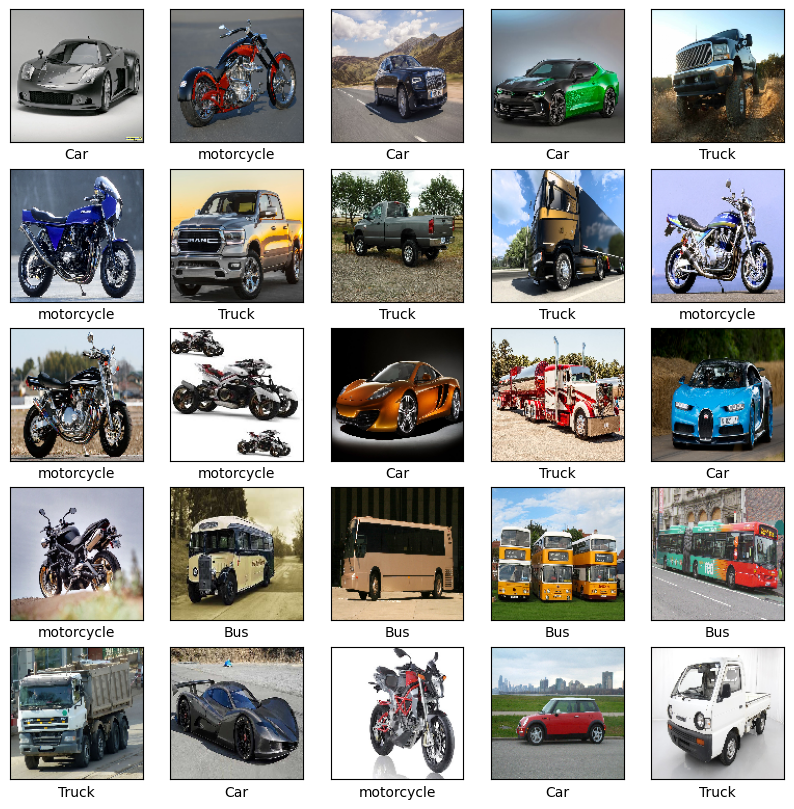

In [ ]:
label_to_index = {label: index for index, label in enumerate(class_names)}

# Select 25 random image indices
random_indices = np.random.choice(len(train_images), size=25, replace=False)

plt.figure(figsize=(10,10))
for idx, random_index in enumerate(random_indices):
    plt.subplot(5,5,idx+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[random_index])  # Use the random_index here
    label_index = label_to_index[train_labels[random_index]]  # And here
    plt.xlabel(class_names[label_index])
plt.show()


## **Let's Use a Pretrained Model: VGG16 Example**
When working with deep learning for image processing, a common strategy is to start with a pretrained model. VGG16, known for its effectiveness in image classification, offers a great example of this approach.

## **Transfer Learning:**
Here, we use the pretrained weights of VGG16 as a base and adapt it to our specific needs by retraining the last few layers. This approach is particularly beneficial when our image categories differ from the original ImageNet classes. By fine-tuning the final layers, we can customize the model for our unique dataset with minimal additional training.

## Other models you can research about:

- **Xception**: An architecture based on depthwise separable convolutions with residual connections.
VGG19: Similar to VGG16 but with 19 layers. It's slightly more complex.
- **ResNet** (variants include ResNet50, ResNet101, ResNet152): A family of models that introduced residual connections to facilitate training of very deep neural networks.
- **ResNetV2** (variants include ResNet50V2, ResNet101V2, ResNet152V2): Improved versions of ResNet with updated architecture for better performance.
- **InceptionV3**: A model that includes inception modules with factorized convolutions and aggressive regularization.
- **InceptionResNetV2**: A hybrid model that combines the inception architecture with residual connections for improved performance.
- **MobileNet:** A class of efficient models designed for mobile and embedded vision applications.
- **MobileNetV2**: An improved version of MobileNet, with inverted residuals and linear bottlenecks.
- **DenseNet** (variants include DenseNet121, DenseNet169, DenseNet201): Models that utilize densely connected convolutional networks, where each layer is connected to every other layer in a feed-forward fashion.
- **NASNet**: Models developed through neural architecture search that provide high efficiency and accuracy.
- **EfficientNet**: A family of models that scales up in a more structured manner to achieve better efficiency and accuracy.
- **MobileNetV3**: An updated version of MobileNet developed through a combination of hardware-aware network architecture search and complementary search techniques on the network layer level.

In [ ]:
# Import the VGG16 model from TensorFlow's Keras applications module.
# VGG16 is a deep convolutional neural network architecture known for its performance on the ImageNet visual recognition challenge.
from tensorflow.keras.applications import VGG16

In [ ]:
# Load the VGG16 model pre-trained weights on ImageNet dataset.
# include_top=False omits the fully connected layers at the top of the network, making it suitable for feature extraction.
# input_shape=(128, 128, 3) sets the shape of the input images the network expects. Here, it's 128x128 pixels with 3 color channels (RGB).
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# Iterate through each layer in the base model.
for layer in VGG_model.layers:
    # Set the layer's trainable attribute to False.
    # This action freezes the weights and biases of the layer during training, meaning they won't be updated.
    # Freezing the pre-trained layers is important in transfer learning because we want to retain the knowledge the model has already learned from the ImageNet dataset.
    layer.trainable = False

In [ ]:
import visualkeras

ModuleNotFoundError: No module named 'visualkeras'

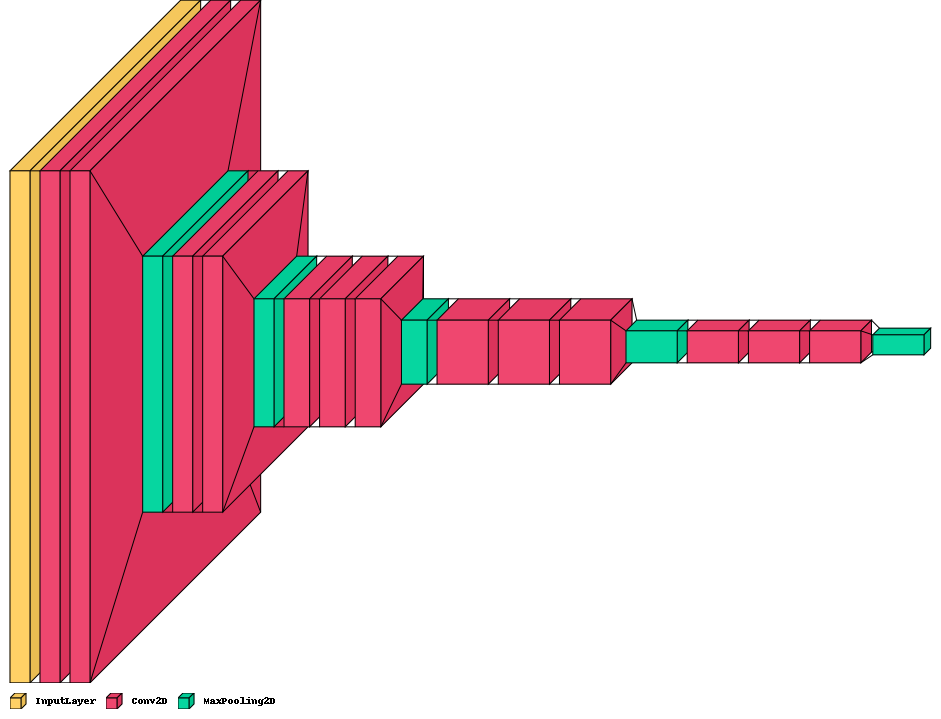

In [ ]:
# Let's visualize the model
visualkeras.layered_view(VGG_model,legend=True)

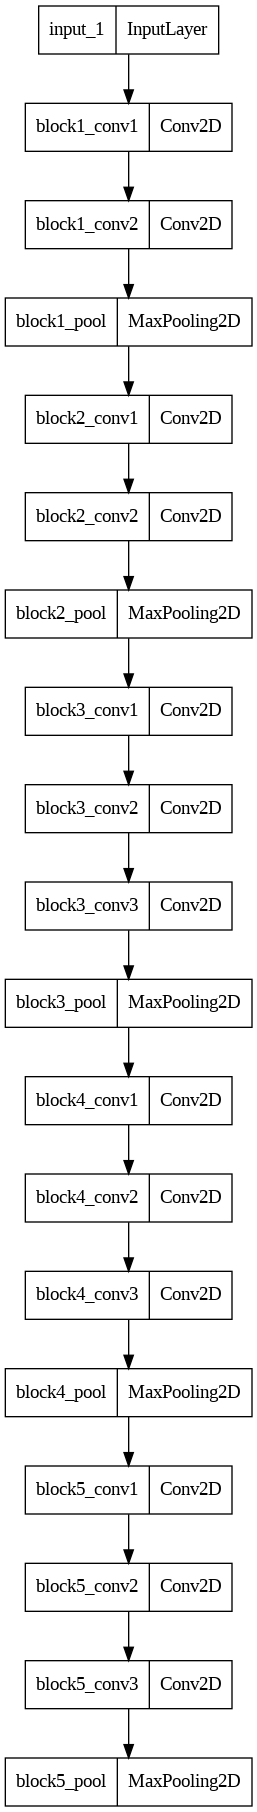

In [ ]:
plot_model(VGG_model)

In [ ]:
# `num_classes` will hold the total number of classes.
num_classes = len(class_names)

# Initialize a Sequential model.
model = models.Sequential()

# Add the pre-trained VGG16 model as the base of your model.
# This includes all the convolutional layers of VGG16, pre-trained on ImageNet.
model.add(VGG_model)

# Flatten the output of the VGG16 model because dense layers expect 1D inputs.
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu')) # Add a Dense (fully connected) layer to interpret the features extracted by VGG16.
# 256 neurons are used here, but this number can be adjusted depending on your dataset's complexity.
model.add(layers.Dropout(0.5)) # Add a Dropout layer to prevent overfitting
# Final Dense layer for classification. The number of neurons equals the number of classes,
# with a softmax activation function to output probabilities for each class.
model.add(layers.Dense(num_classes, activation='softmax'))

Let's display the architecture of your model so far:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 16813124 (64.14 MB)
Trainable params: 2098436 (8.00 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


### Compile and train the model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels_encoded , epochs=15,
                    validation_data=(test_images, test_labels_encoded))

Epoch 1/15
10/10 [==============================] - 11s 397ms/step - loss: 1.5395 - accuracy: 0.4867 - val_loss: 0.9963 - val_accuracy: 0.5700
Epoch 2/15
10/10 [==============================] - 1s 57ms/step - loss: 0.6002 - accuracy: 0.7533 - val_loss: 0.4703 - val_accuracy: 0.8100
Epoch 3/15
10/10 [==============================] - 1s 58ms/step - loss: 0.4080 - accuracy: 0.8567 - val_loss: 0.5569 - val_accuracy: 0.7600
Epoch 4/15
10/10 [==============================] - 1s 57ms/step - loss: 0.2109 - accuracy: 0.9133 - val_loss: 0.5349 - val_accuracy: 0.7700
Epoch 5/15
10/10 [==============================] - 1s 59ms/step - loss: 0.1479 - accuracy: 0.9500 - val_loss: 0.4135 - val_accuracy: 0.8200
Epoch 6/15
10/10 [==============================] - 1s 58ms/step - loss: 0.1026 - accuracy: 0.9633 - val_loss: 0.3853 - val_accuracy: 0.8600
Epoch 7/15
10/10 [==============================] - 1s 58ms/step - loss: 0.0585 - accuracy: 0.9967 - val_loss: 0.3979 - val_accuracy: 0.8500
Epoch 8/15


### Evaluate the model

4/4 - 0s - loss: 0.4254 - accuracy: 0.8500 - 200ms/epoch - 50ms/step


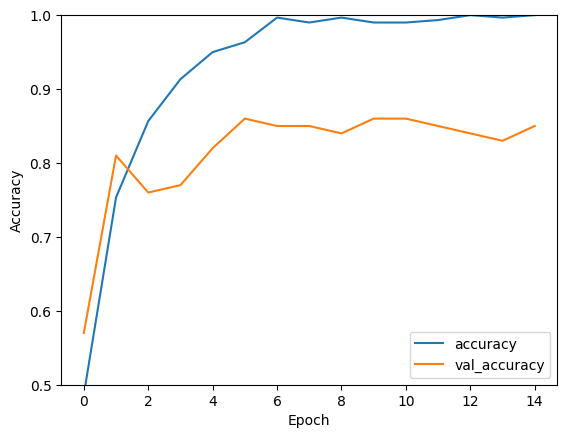

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels_encoded, verbose=2)

In [ ]:
print(test_acc)

0.8500000238418579


4/4 [==============================] - 0s 55ms/step


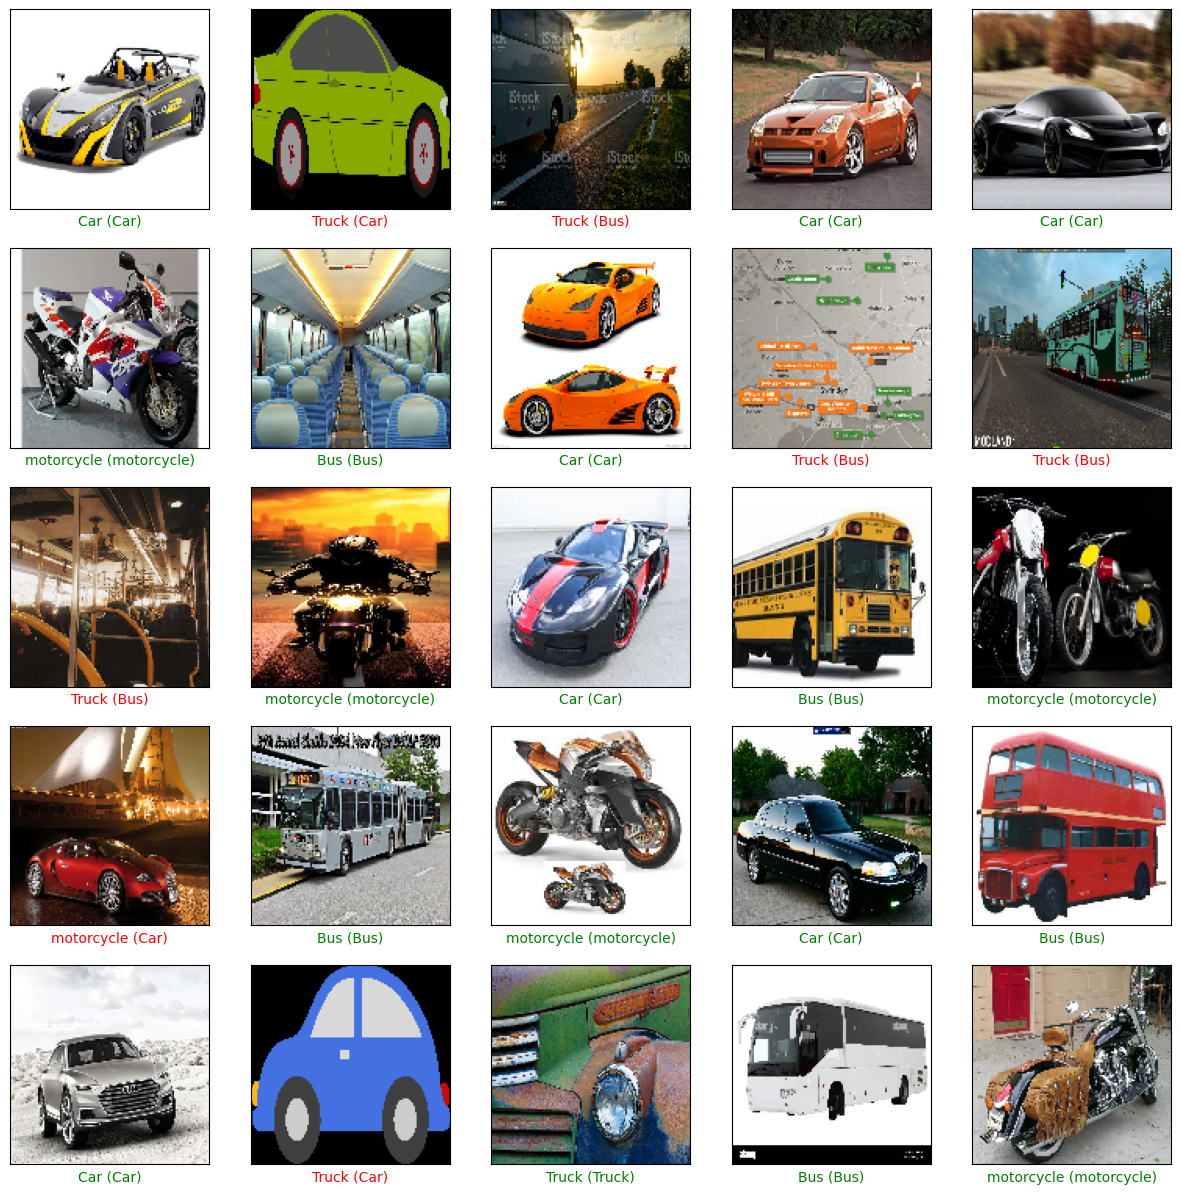

In [ ]:
# First, get predictions for validation images
predicted_scores = model.predict(test_images)  # Note: We are using test_images as you named your validation set 'test'
predicted_labels = np.argmax(predicted_scores, axis=1)

# Convert numerical labels back to class names
index_to_label = {index: label for label, index in label_to_index.items()}

# Select 25 random image indices from the validation set
random_indices = np.random.choice(len(test_images), size=25, replace=False)

plt.figure(figsize=(15,15))
for idx, random_index in enumerate(random_indices):
    plt.subplot(5,5,idx+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[random_index])
    predicted_label = index_to_label[predicted_labels[random_index]]
    true_label = test_labels[random_index]
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel(f"{predicted_label} ({true_label})", color=color)  # Plotting predicted label (true label)
plt.show()


In [ ]:
test_labels

array(['Bus', 'Bus', 'Bus', 'Bus', 'Bus', 'Bus', 'Bus', 'Bus', 'Bus',
       'Bus', 'Bus', 'Bus', 'Bus', 'Bus', 'Bus', 'Bus', 'Bus', 'Bus',
       'Bus', 'Bus', 'Bus', 'Bus', 'Bus', 'Bus', 'Bus', 'Car', 'Car',
       'Car', 'Car', 'Car', 'Car', 'Car', 'Car', 'Car', 'Car', 'Car',
       'Car', 'Car', 'Car', 'Car', 'Car', 'Car', 'Car', 'Car', 'Car',
       'Car', 'Car', 'Car', 'Car', 'Car', 'motorcycle', 'motorcycle',
       'motorcycle', 'motorcycle', 'motorcycle', 'motorcycle',
       'motorcycle', 'motorcycle', 'motorcycle', 'motorcycle',
       'motorcycle', 'motorcycle', 'motorcycle', 'motorcycle',
       'motorcycle', 'motorcycle', 'motorcycle', 'motorcycle',
       'motorcycle', 'motorcycle', 'motorcycle', 'motorcycle',
       'motorcycle', 'motorcycle', 'motorcycle', 'Truck', 'Truck',
       'Truck', 'Truck', 'Truck', 'Truck', 'Truck', 'Truck', 'Truck',
       'Truck', 'Truck', 'Truck', 'Truck', 'Truck', 'Truck', 'Truck',
       'Truck', 'Truck', 'Truck', 'Truck', 'Truck', 'Truck

In [ ]:
# Convert numerical labels back to class names
# Convert numerical labels back to class names
predicted_labels = [index_to_label[index] for index in predicted_labels]

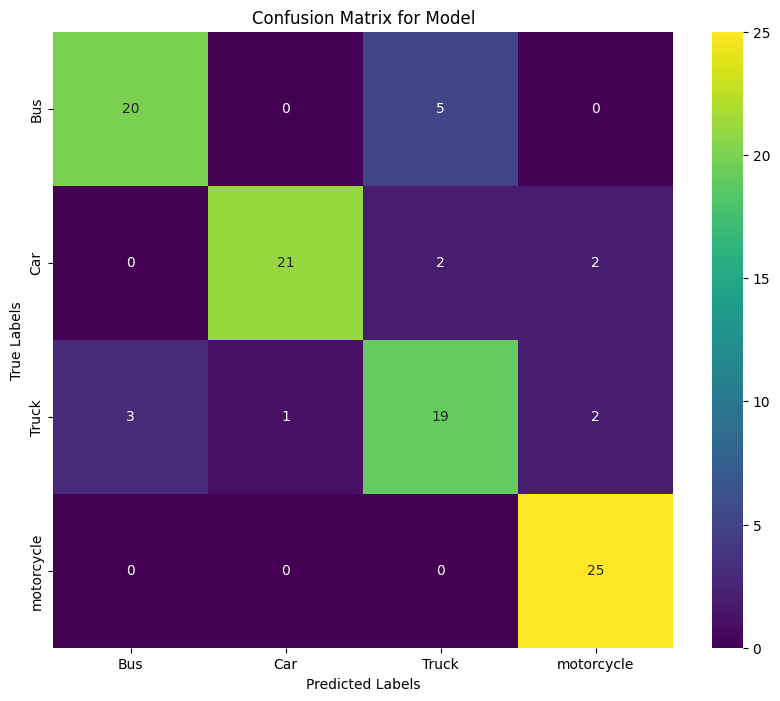

In [ ]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_labels)

# Plot the confusion matrix using a heatmap.
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis',
            xticklabels=[index_to_label[i] for i in range(len(index_to_label))],
            yticklabels=[index_to_label[i] for i in range(len(index_to_label))])
plt.title('Confusion Matrix for Model')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()